# Zadanie domowe - EDA Danych dotyczących Titanica

* Twoim zadaniem jest wykonanie analizy danych zawartych w załączonym pliku CSV (`26__titanic.csv`).
* Plik znajduje się pod video. Pamiętaj, żeby wrzucić plik do tego samego folderu, w którym znajduje się ten notebook.
* Wykorzystaj nowo nabytą wiedzę z biblioteki `Pandas`
* Jeżeli jest taka konieczność posiłkuj się [code explainerem](https://codeexplainer.imprv.ai/) lub / i [data chatterem](https://datachatter.imprv.ai/) (który również te dane ma dostępne).
* Prześlij na discordzie notebook z rozwiązaniem (`#modul-4-zad2`)
* Pamiętaj:

1. Nie spiesz się
2. Potraktuj zadanie domowe jak prawdziwy projekt
3. Dodawaj opisy, obserwacje, wnioski
4. Dodaj wizualizacje
5. Dodaj konkluzję i wnioski końcowe

Powodzenia!!! I mega zabawy!

# O Danych

Dane o pasażerach Titanica

Zbiór danych zawiera informacje o pasażerach RMS Titanic, który zatonął 15 kwietnia 1912 roku po zderzeniu z górą
lodową. Dane obejmują takie atrybuty jak klasa podróży, wiek, płeć, liczba rodzeństwa/małżonków na pokładzie,
liczba rodziców/dzieci na pokładzie, cena biletu oraz miejsce zaokrętowania.

Zbiór zawiera także informację o tym, czy pasażer przeżył katastrofę.

Titanic przewoził ponad 2,200 osób, z czego ponad 1,500 zginęło, co czyni tę katastrofę jedną z najbardziej
tragicznych w historii morskiej.

Kolumny:

* **pclass** - Klasa biletu
* **survived** - Czy pasażer przeżył katastrofę
* **name** - Imię i nazwisko pasażera
* **sex** - Płeć pasażera
* **age** - Wiek pasażera
* **sibsp** - Liczba rodzeństwa/małżonków na pokładzie
* **parch** - Liczba rodziców/dzieci na pokładzie
* **ticket** - Numer biletu
* **fare** - Cena biletu
* **cabin** - Numer kabiny
* **embarked** - Port, w którym pasażer wszedł na pokład (C = Cherbourg, Q = Queenstown, S = Southampton)
* **boat** - Numer łodzi ratunkowej
* **body** - Numer ciała (jeśli pasażer nie przeżył i ciało zostało odnalezione)
* **home.dest** - Miejsce docelowe

In [179]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
!pip install seaborn
import seaborn as sns
import re

In [180]:
pd.set_option('display.max_rows', 10)

In [181]:
df = pd.read_csv('26__titanic.csv', sep=",")
df

pclass  survived                                             name  \
0        1.0       1.0                    Allen, Miss. Elisabeth Walton   
1        1.0       1.0                   Allison, Master. Hudson Trevor   
2        1.0       0.0                     Allison, Miss. Helen Loraine   
3        1.0       0.0             Allison, Mr. Hudson Joshua Creighton   
4        1.0       0.0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)   
...      ...       ...                                              ...   
1305     3.0       0.0                            Zabour, Miss. Thamine   
1306     3.0       0.0                        Zakarian, Mr. Mapriededer   
1307     3.0       0.0                              Zakarian, Mr. Ortin   
1308     3.0       0.0                               Zimmerman, Mr. Leo   
1309     NaN       NaN                                              NaN   

         sex      age  sibsp  parch  ticket      fare    cabin embarked boat  \
0     female  29.0000    0.0    0.0   24160  211.3375       B5        S    2   
1       male   0.9167    1.0    2.0  113781  151.5500  C22 C26        S   11   
2     female   2.0000    1.0    2.0  113781  151.5500  C22 C26        S  NaN   
3       male  30.0000    1.0    2.0  113781  151.5500  C22 C26        S  NaN   
4     female  25.0000    1.0    2.0  113781  151.5500  C22 C26        S  NaN   
...      ...      ...    ...    ...     ...       ...      ...      ...  ...   
1305  female      NaN    1.0    0.0    2665   14.4542      NaN        C  NaN   
1306    male  26.5000    0.0    0.0    2656    7.2250      NaN        C  NaN   
1307    male  27.0000    0.0    0.0    2670    7.2250      NaN        C  NaN   
1308    male  29.0000    0.0    0.0  315082    7.8750      NaN        S  NaN   
1309     NaN      NaN    NaN    NaN     NaN       NaN      NaN      NaN  NaN   

       body                        home.dest  
0       NaN                     St Louis, MO  
1       NaN  Montreal, PQ / Chesterville, ON  
2       NaN  Montreal, PQ / Chesterville, ON  
3     135.0  Montreal, PQ / Chesterville, ON  
4       NaN  Montreal, PQ / Chesterville, ON  
...     ...                              ...  
1305    NaN                              NaN  
1306  304.0                              NaN  
1307    NaN                              NaN  
1308    NaN                              NaN  
1309    NaN                              NaN  

[1310 rows x 14 columns]

## 1. Ogólny przegląd danych

Na początku naszej analizy przyjrzyjmy się danym.

### 1.1 10 przykładowych wierszy

In [108]:
df.sample(10)

pclass  survived                                               name  \
56       1.0       1.0                         Carter, Mr. William Ernest   
231      1.0       1.0                     Peuchen, Major. Arthur Godfrey   
734      3.0       1.0             Coutts, Master. William Loch "William"   
105      1.0       0.0                           Evans, Miss. Edith Corse   
43       1.0       1.0    Bucknell, Mrs. William Robert (Emma Eliza Ward)   
581      2.0       0.0                         Watson, Mr. Ennis Hastings   
903      3.0       0.0  Johnston, Mrs. Andrew G (Elizabeth "Lily" Watson)   
1168     3.0       0.0                                Sadowitz, Mr. Harry   
178      1.0       1.0   Kimball, Mrs. Edwin Nelson Jr (Gertrude Parsons)   
107      1.0       1.0               Flegenheim, Mrs. Alfred (Antoinette)   

         sex   age  sibsp  parch      ticket      fare    cabin embarked boat  \
56      male  36.0    1.0    2.0      113760  120.0000  B96 B98        S    C   
231     male  52.0    0.0    0.0      113786   30.5000     C104        S    6   
734     male   3.0    1.0    1.0  C.A. 37671   15.9000      NaN        S    2   
105   female  36.0    0.0    0.0    PC 17531   31.6792      A29        C  NaN   
43    female  60.0    0.0    0.0       11813   76.2917      D15        C    8   
581     male   NaN    0.0    0.0      239856    0.0000      NaN        S  NaN   
903   female   NaN    1.0    2.0  W./C. 6607   23.4500      NaN        S  NaN   
1168    male   NaN    0.0    0.0     LP 1588    7.5750      NaN        S  NaN   
178   female  45.0    1.0    0.0       11753   52.5542      D19        S    5   
107   female   NaN    0.0    0.0    PC 17598   31.6833      NaN        S    7   

      body             home.dest  
56     NaN         Bryn Mawr, PA  
231    NaN           Toronto, ON  
734    NaN  England Brooklyn, NY  
105    NaN          New York, NY  
43     NaN      Philadelphia, PA  
581    NaN               Belfast  
903    NaN                   NaN  
1168   NaN                   NaN  
178    NaN            Boston, MA  
107    NaN          New York, NY

### 1.2 Modyfikacja zapisu danych o biletach

Widzimy, że numer biletu określany jest zarówno literami jak i liczbami. Potraktujmy to jako dwie dane i oddzielmy je na dwie kolumny: ticket letters i ticket numbers:

In [182]:
df['ticket'] = df['ticket'].astype(str)

df['ticket_letters'] = df['ticket'].str.extract('(\D*)')
df['ticket_number'] = df['ticket'].str.extract('(\d*)')

# convert 'ticket number' into number format
df['ticket_number'] = pd.to_numeric(df['ticket_number'], errors='coerce')

df = df.drop(columns=['ticket'])

In [110]:
df['ticket_letters'] = df['ticket_letters'].replace('', np.nan)

In [183]:
df.sample(10)

pclass  survived                                               name  \
43       1.0       1.0    Bucknell, Mrs. William Robert (Emma Eliza Ward)   
618      3.0       0.0                           Allen, Mr. William Henry   
1026     3.0       1.0                                 Moor, Mrs. (Beila)   
368      2.0       0.0                            Chapman, Mr. John Henry   
606      3.0       1.0           Abrahamsson, Mr. Abraham August Johannes   
293      1.0       1.0  Taylor, Mrs. Elmer Zebley (Juliet Cummins Wright)   
871      3.0       0.0                                   Horgan, Mr. John   
912      3.0       0.0                                  Karaic, Mr. Milan   
864      3.0       0.0                     Henriksson, Miss. Jenny Lovisa   
1278     3.0       0.0                             Vendel, Mr. Olof Edvin   

         sex   age  sibsp  parch     fare cabin embarked boat  body  \
43    female  60.0    0.0    0.0  76.2917   D15        C    8   NaN   
618     male  35.0    0.0    0.0   8.0500   NaN        S  NaN   NaN   
1026  female  27.0    0.0    1.0  12.4750  E121        S   14   NaN   
368     male  37.0    1.0    0.0  26.0000   NaN        S  NaN  17.0   
606     male  20.0    0.0    0.0   7.9250   NaN        S   15   NaN   
293   female   NaN    1.0    0.0  52.0000  C126        S  5 7   NaN   
871     male   NaN    0.0    0.0   7.7500   NaN        Q  NaN   NaN   
912     male  30.0    0.0    0.0   7.8958   NaN        S  NaN   NaN   
864   female  28.0    0.0    0.0   7.7750   NaN        S  NaN   NaN   
1278    male  20.0    0.0    0.0   7.8542   NaN        S  NaN   NaN   

                                              home.dest ticket_letters  \
43                                     Philadelphia, PA                  
618   Lower Clapton, Middlesex or Erdington, Birmingham                  
1026                                                NaN                  
368                              Cornwall / Spokane, WA         SC/AH    
606                   Taalintehdas, Finland Hoboken, NJ        SOTON/O   
293                           London /  East Orange, NJ                  
871                                                 NaN                  
912                                                 NaN                  
864                                                 NaN                  
1278                                                NaN                  

      ticket_number  
43          11813.0  
618        373450.0  
1026       392096.0  
368             NaN  
606             NaN  
293         19996.0  
871        370377.0  
912        349246.0  
864        347086.0  
1278       350416.0

### 1.3 Krótka analiza najważniejszych statystyk opisujących dane z poszczególnych kolumn:

In [8]:
df.describe()

pclass     survived          age        sibsp        parch  \
count  1309.000000  1309.000000  1046.000000  1309.000000  1309.000000   
mean      2.294882     0.381971    29.881135     0.498854     0.385027   
std       0.837836     0.486055    14.413500     1.041658     0.865560   
min       1.000000     0.000000     0.166700     0.000000     0.000000   
25%       2.000000     0.000000    21.000000     0.000000     0.000000   
50%       3.000000     0.000000    28.000000     0.000000     0.000000   
75%       3.000000     1.000000    39.000000     1.000000     0.000000   
max       3.000000     1.000000    80.000000     8.000000     9.000000   

              fare        body  ticket_number  
count  1308.000000  121.000000   9.570000e+02  
mean     33.295479  160.809917   2.490391e+05  
std      51.758668   97.696922   4.426853e+05  
min       0.000000    1.000000   6.800000e+02  
25%       7.895800   72.000000   1.995000e+04  
50%      14.454200  155.000000   2.346040e+05  
75%      31.275000  256.000000   3.474680e+05  
max     512.329200  328.000000   3.101298e+06

Widzimy tutaj wyliczenie średniej arytmetycznej (mean), odchylenie standardowe, wartości minimalne, maksymalne oraz wartości odpowiednio w 25, 50 oraz 75% obserwacji. To co można obserwować dla całego zbioru danych:

- Średnia wieku pasażerów to prawie 30 lat- ale odchylenie standardowe jest w tym zbiorze danych bardzo duże, co oznacza, że na Titanicu byli przedstawiciele różnych pokoleń, od osób bardzo młodych po osoby o wiele starsze niż uśrednione 30 lat. Najmłodszy pasażer miał 0,16 roku, a najstarszy - 80 lat. Jednocześnie widać, że większość pasażerów (poniżej 75%) była młodsza niż 39 lat.
- Największe, dające sensowną informację odchylenie standardowe (w kolumnach gdzie ma to logiczne zastosowanie) widzimy w kolumnie danych dotyczących cen biletu pasażerów - co mówi nam o różnicach ekonomicznych wśród pasażerów. I rzeczywiście- minimalna wartość to 0 dolarów (zapewne załoga statku), a maksymalna - 512 dolarów. Większość pasażerów (75%) zapłaciła za bilet mniej niż 31 dolarów a połowa osób na pokładzie - mniej niż 14 dolarów.
- Wszyscy pasażerowie dzielili się na 3 klasy według wykupionego biletu. Pasażerowie drugiej klasy to około 25%, pasażerowie 3 klasy to około 50% wszystkich pasażerów. To w porównaniu z danymi o cenie biletu oczywiście oznacza, żę najbogatsi pasażerowie stanowili 1 klasę pasażerów i było ich również około 25%.
- Liczba ciał odnalezionych po katastrofie to tylko 121 ciała - chociaż nie zrozumiała na razie dla mnie metoda liczenia ciał jako najwyższy numer pokazuje numer ciała odnalezionego: 328

### 1.4 Analiza danych w podziale na klasy pasażerów.

Zobaczmy jak wyżej opsane dane wyglądają, jeśli podzielimy je na te 3 klasy pasażerów:

In [119]:
groups = df.groupby('pclass')

for name, group in groups:
    print(f"\npclass: {name}\n")
    print(group.describe())


pclass: 1.0

       pclass    survived         age       sibsp       parch        fare  \
count   323.0  323.000000  284.000000  323.000000  323.000000  323.000000   
mean      1.0    0.619195   39.159918    0.436533    0.365325   87.508992   
std       0.0    0.486338   14.548059    0.609064    0.715602   80.447178   
min       1.0    0.000000    0.916700    0.000000    0.000000    0.000000   
25%       1.0    0.000000   28.000000    0.000000    0.000000   30.695800   
50%       1.0    1.000000   39.000000    0.000000    0.000000   60.000000   
75%       1.0    1.000000   50.000000    1.000000    0.500000  107.662500   
max       1.0    1.000000   80.000000    3.000000    4.000000  512.329200   

             body  ticket_number  
count   35.000000     224.000000  
mean   162.828571   60923.937500  
std     82.652172   47572.161207  
min     16.000000     680.000000  
25%    109.500000   16966.000000  
50%    166.000000   35281.000000  
75%    233.000000  113059.000000  
max    307.0

Z tego podziału widzimy już więcej szczegółów:
- Najdroższe ilety w klasie 1  to rzeczywiście 512 dolarów za bilet. W klasie drugiej najdroższy bilet to 73,5 dolara, a w klasie 3 najdroższy bilet to 69,55 dolara. W każej klasie byli pasażerowie płynący za darmo (załoga? pracownicy armatora?)
- Klasą 1-wszą podróżowały 323 osoby, których dane tutaj się znajdują, w klasie 2-giej 277 osób, a w klasie 3-ciej 709 osób
- W klasie 3-ciej zdarzały się rodziny nawet 8-mio i 9-cio osobowe. Stanowiły one mniej niż 25% wszystkich pasażeró 3-ciej klasy.
- Wśród ofiar katastrofy odnaleziono 55 ciał pasażerów klasy 3-ciej, 31 ciał pasażerów klasy 2-giej i 35 ciał pasażerów klasy 1-wszej.



### 1.5 Analiza w podziale na płeć

In [10]:
groups = df.groupby('sex')


for name, group in groups:
    
    print(f"\nsex: {name}\n")

    
    print(group.describe().to_string())


sex: female

           pclass    survived         age       sibsp       parch        fare        body  ticket_number
count  466.000000  466.000000  388.000000  466.000000  466.000000  466.000000    8.000000   3.420000e+02
mean     2.154506    0.727468   28.687071    0.652361    0.633047   46.198097  166.625000   2.415890e+05
std      0.866181    0.445741   14.576995    1.101009    1.049579   63.292599  138.110657   4.673953e+05
min      1.000000    0.000000    0.166700    0.000000    0.000000    6.750000    7.000000   2.003000e+03
25%      1.000000    0.000000   19.000000    0.000000    0.000000   10.504175   52.750000   1.746525e+04
50%      2.000000    1.000000   27.000000    0.000000    0.000000   23.000000  133.500000   1.138045e+05
75%      3.000000    1.000000   38.000000    1.000000    1.000000   55.331275  306.000000   3.470728e+05
max      3.000000    1.000000   76.000000    8.000000    9.000000  512.329200  328.000000   3.101298e+06

sex: male

           pclass    survived

W grupie 1309 osób mamy 466 kobiet i 843 mężczyzn.

Rzecz, która rzuca się w oczy to liczba odnalezionych ciał: odnaleziono tylko 8 ciał kobiet, reszta ofiar (113 z 121 odnalezionych ciał) to mężczyźni.

### 1.6 Wartości unikatowe

In [121]:
pd.set_option('display.max_rows', None)

df.nunique()

unikatowe = df.nunique()

unikatowe_df = unikatowe.reset_index()
unikatowe_df.columns = ['Kolumna', 'Liczba unikatowych wartości']

unikatowe_df


Kolumna  Liczba unikatowych wartości
0           pclass                            3
1         survived                            2
2             name                         1307
3              sex                            2
4              age                           98
5            sibsp                            7
6            parch                            8
7             fare                          281
8            cabin                          186
9         embarked                            3
10            boat                           27
11            body                          121
12       home.dest                          369
13  ticket_letters                           48
14   ticket_number                          705

Widzimy, że rzeczywiście pasażerowie Titanica dzielili się na 3 klasy, ratowali się na 27 łodziach, a odnaleziono 121 ciał. Nie wiemy jeszcze ile osób z tego opisanego zbioru 1309 osób tak naprawdę przeżyło.


## 2 Analiza brakujących wartości

Aby upewnić się o tym, że danych nam nie brakuje policzmy ilość pustych komórek w każdej kolumnie:

In [122]:
brakujące_dane = df.isnull().sum()

df_brakujące_dane = pd.DataFrame(brakujące_dane, columns=['Brakujące dane'])

df_brakujące_dane['% brakujących danych'] = ((df.isnull().sum() / df.shape[0]) * 100).apply(lambda x: f'{x:.2f}%')


df_brakujące_dane.columns = ['Brakujące dane', '% brakujących danych']

df_brakujące_dane


Brakujące dane % brakujących danych
pclass                       1                0.08%
survived                     1                0.08%
name                         1                0.08%
sex                          1                0.08%
age                        264               20.15%
sibsp                        1                0.08%
parch                        1                0.08%
fare                         2                0.15%
cabin                     1015               77.48%
embarked                     3                0.23%
boat                       824               62.90%
body                      1189               90.76%
home.dest                  565               43.13%
ticket_letters             957               73.05%
ticket_number              353               26.95%

**Powyższe zestawienie mówi nam, że brakujące dane występują najczęściej w kolumnach:**
- body - numer ciała, jeżeli pasażer nie przeżył i jego ciała nie odnaleziono. Jak widać z zestawień już analizowanych w tej kolumnie wartości brak również gdy pasażerowie przeżyli, więc trzeba to wziąć również pod uwagę przy dalszej analizie;
- ticket letters- tylko małą część biletów była oznaczana dodatkowo literami
- ticket number - brakuje liczb w numerze biletu w sporej ilości przypadków
- cabin - numer kabiny przypisanej do pasażera
- boat - numer łodzi ratunkowej danego pasażera. Tutaj również związek z brakiem danych może mieć fakt, że ci pasażerowie, któzy zginęli a ich ciał nie odnaleziono - także nie mają przypisanej łodzi ratunkowej
- home.dest
- age.

Braki w innych kolumnach są bardzo nieznaczne.

## 3 Eksploatacja poszczególnych kolumn

#### 3.1 Analiza informacji o ilości ofiar i osób które przeżyły

In [163]:
df['survived'].value_counts()

0.0    809
1.0    500
Name: survived, dtype: int64

Z grupy 1309 osób zginęło 500 osób, czyli 38%.

Wizualizacja podziału pasażerów ze względu na płeć i klasę zakupionego biletu.

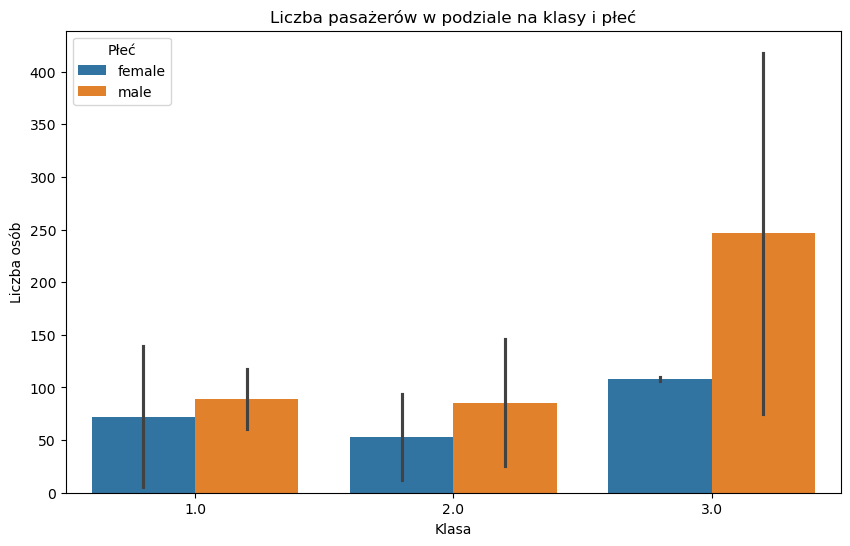

In [164]:
grouped_data = df.groupby(['pclass', 'sex', 'survived']).size().reset_index(name='Count')


plt.figure(figsize=(10, 6))
sns.barplot(x="pclass", y="Count", hue="sex", data=grouped_data)

plt.title("Liczba pasażerów w podziale na klasy i płeć")
plt.xlabel('Klasa')
plt.ylabel('Liczba osób')

plt.legend(title='Płeć')

plt.show()

**Procentowe ujęcie pasażerów zmarłych i tych, którzy przeżyli do całkowitej liczby pasażerów - w podziale na płeć i klasę biletu**

In [167]:
wszyscy = len(df)

grouped_data = df.groupby(['pclass', 'sex', 'survived']).size().reset_index(name='Ilość')

grouped_data['Procent całości'] = grouped_data['Ilość'] / wszyscy * 100

grouped_data.columns = ['Klasa biletu', 'Płeć', 'Ocaleni / zmarli', 'Ilość', 'Procent całości']

grouped_data


Klasa biletu    Płeć  Ocaleni / zmarli  Ilość  Procent całości
0            1.0  female               0.0      5         0.381679
1            1.0  female               1.0    139        10.610687
2            1.0    male               0.0    118         9.007634
3            1.0    male               1.0     61         4.656489
4            2.0  female               0.0     12         0.916031
5            2.0  female               1.0     94         7.175573
6            2.0    male               0.0    146        11.145038
7            2.0    male               1.0     25         1.908397
8            3.0  female               0.0    110         8.396947
9            3.0  female               1.0    106         8.091603
10           3.0    male               0.0    418        31.908397
11           3.0    male               1.0     75         5.725191

**Ujęcie procentowe ocalałych, zmarłych oraz ogólnej liczby pasażerów podzielonych na klasy i płeć**

In [151]:
grouped_total = df.groupby(['sex', 'pclass']).size().reset_index(name='Wszystkie kobiety lub mężczyźni w tej klasie')

grouped_survived = df[df['survived'] == 1].groupby(['sex', 'pclass']).size().reset_index(name='Ocaleni')

grouped_died = df[df['survived'] == 0].groupby(['sex', 'pclass']).size().reset_index(name='Zmarli')

grouped_data = pd.merge(grouped_total, grouped_survived, on=['sex', 'pclass'])
grouped_data = pd.merge(grouped_data, grouped_died, on=['sex', 'pclass'])

total_people = df.shape[0]

grouped_data['Procent_ocalonych'] = (grouped_data['Ocaleni'] / grouped_data['Wszystkie kobiety lub mężczyźni w tej klasie']) * 100
grouped_data['Procent_zmarłych'] = (grouped_data['Zmarli'] / grouped_data['Wszystkie kobiety lub mężczyźni w tej klasie']) * 100
grouped_data['Procent_ogółem'] = (grouped_data['Wszystkie kobiety lub mężczyźni w tej klasie'] / total_people) * 100


grouped_data


sex  pclass  Wszystkie kobiety lub mężczyźni w tej klasie  Ocaleni  \
0  female     1.0                                           144      139   
1  female     2.0                                           106       94   
2  female     3.0                                           216      106   
3    male     1.0                                           179       61   
4    male     2.0                                           171       25   
5    male     3.0                                           493       75   

   Zmarli  Procent_ocalonych  Procent_zmarłych  Procent_ogółem  
0       5          96.527778          3.472222       10.992366  
1      12          88.679245         11.320755        8.091603  
2     110          49.074074         50.925926       16.488550  
3     118          34.078212         65.921788       13.664122  
4     146          14.619883         85.380117       13.053435  
5     418          15.212982         84.787018       37.633588

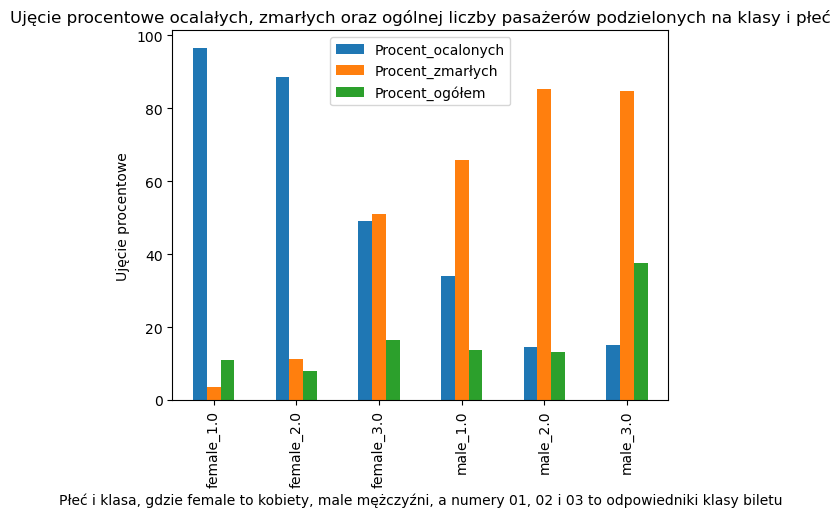

In [139]:
grouped_total = df.groupby(['sex', 'pclass']).size().reset_index(name='Total')
grouped_survived = df[df['survived'] == 1].groupby(['sex', 'pclass']).size().reset_index(name='Survived')
grouped_died = df[df['survived'] == 0].groupby(['sex', 'pclass']).size().reset_index(name='Died')
grouped_data = pd.merge(grouped_total, grouped_survived, on=['sex', 'pclass'])
grouped_data = pd.merge(grouped_data, grouped_died, on=['sex', 'pclass'])
total_people = df.shape[0]
grouped_data['Procent_ocalonych'] = (grouped_data['Survived'] / grouped_data['Total']) * 100
grouped_data['Procent_zmarłych'] = (grouped_data['Died'] / grouped_data['Total']) * 100
grouped_data['Procent_ogółem'] = (grouped_data['Total'] / total_people) * 100


grouped_data['sex_pclass'] = grouped_data['sex'] + '_' + grouped_data['pclass'].astype(str)

grouped_data.plot(kind='bar', x='sex_pclass', y=['Procent_ocalonych', 'Procent_zmarłych', 'Procent_ogółem'])
plt.xlabel('Płeć i klasa, gdzie female to kobiety, male mężczyźni, a numery 01, 02 i 03 to odpowiedniki klasy biletu')
plt.ylabel('Ujęcie procentowe')
plt.title('Ujęcie procentowe ocalałych, zmarłych oraz ogólnej liczby pasażerów podzielonych na klasy i płeć')
plt.show()



plt.show()

**Poniżej - wykres obrazujący liczbę pasażerów: ocaleni, podzieleni według klasy biletu i płci**

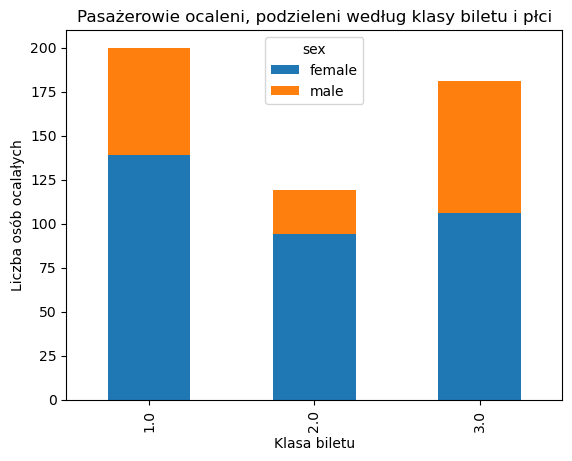

In [50]:
ocaleni = df[df['survived'] == 1].groupby(['pclass', 'sex']).size()


ocaleni_unstacked = ocaleni.unstack()

ocaleni_unstacked.plot(kind='bar', stacked=True)

plt.title('Pasażerowie ocaleni, podzieleni według klasy biletu i płci')
plt.xlabel('Klasa biletu')
plt.ylabel('Liczba osób ocalałych')
plt.show()

**Wykres kołowy pokazujący procentowy podział na pasażerów którzy zginęli i przeżyli , z podziałem na obie płcie**

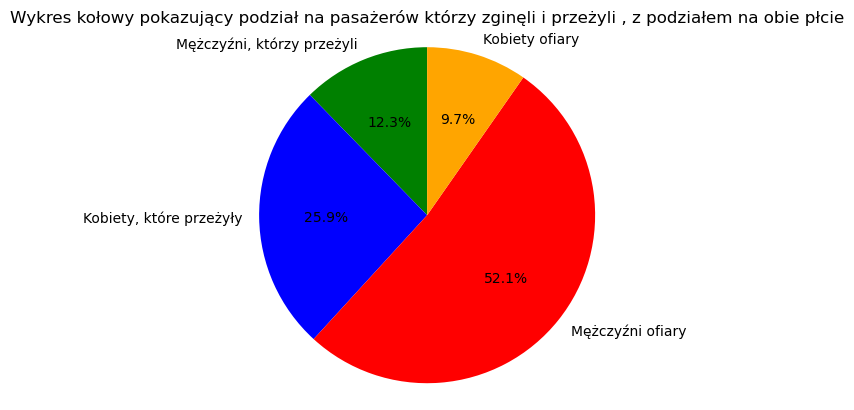

In [115]:
survived_men = grouped_data[(grouped_data['survived'] == 1) & (grouped_data['sex'] == 'male')]
survived_women = grouped_data[(grouped_data['survived'] == 1) & (grouped_data['sex'] == 'female')]
not_survived_men = grouped_data[(grouped_data['survived'] == 0) & (grouped_data['sex'] == 'male')]
not_survived_women = grouped_data[(grouped_data['survived'] == 0) & (grouped_data['sex'] == 'female')]

# Calculate sums for each subgroup
survived_men_sum = survived_men['Count'].sum()
survived_women_sum = survived_women['Count'].sum()
not_survived_men_sum = not_survived_men['Count'].sum()
not_survived_women_sum = not_survived_women['Count'].sum()

# Prepare data for pie chart
sizes = [survived_men_sum, survived_women_sum, not_survived_men_sum, not_survived_women_sum]
labels = ['Mężczyźni, którzy przeżyli', 'Kobiety, które przeżyły', 'Mężczyźni ofiary', 'Kobiety ofiary']
colors = ['green', 'blue', 'red', 'orange']

# Plotting pie chart
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)

# Ensure pie chart is drawn in a circle
ax.axis('equal')

# Add a title to the pie chart
ax.set_title('Wykres kołowy pokazujący podział na pasażerów którzy zginęli i przeżyli , z podziałem na obie płcie')

# Display the pie chart
plt.show()

**Wykres liczby osób ocalałych w zależności od płci i klasy biletu**

In [52]:
grouped = df.groupby(['sex', 'pclass'])['survived'].sum()

table = grouped.reset_index()  

print(table)

      sex  pclass  survived
0  female     1.0     139.0
1  female     2.0      94.0
2  female     3.0     106.0
3    male     1.0      61.0
4    male     2.0      25.0
5    male     3.0      75.0


<Axes: xlabel='sex', ylabel='survived'>

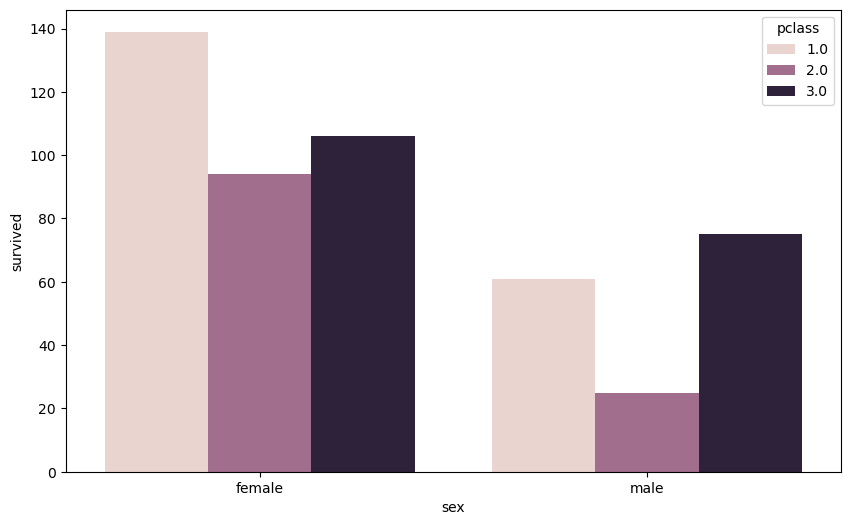

In [53]:
plt.figure(figsize=(10, 6))

sns.barplot(x='sex', y='survived', hue='pclass', data=table)

**Pasażerowie którzy zginęli- w podziale na płeć i klasę biletu - liczba i ujęcie procentowe w obrębie danej klasy i płci**

In [168]:
survived = df[df['survived'] == 0].groupby(['sex', 'pclass']).size().unstack()
survived_df = survived.stack().reset_index().rename(columns={0:'Liczba ofiar'})
survived_df['Procent'] =  (survived_df['Liczba ofiar'] / survived_df['Liczba ofiar'].sum())*100

survived_df
 

sex  pclass  Liczba ofiar    Procent
0  female     1.0             5   0.618047
1  female     2.0            12   1.483313
2  female     3.0           110  13.597033
3    male     1.0           118  14.585909
4    male     2.0           146  18.046972
5    male     3.0           418  51.668727

<Axes: xlabel='sex', ylabel='Procent'>

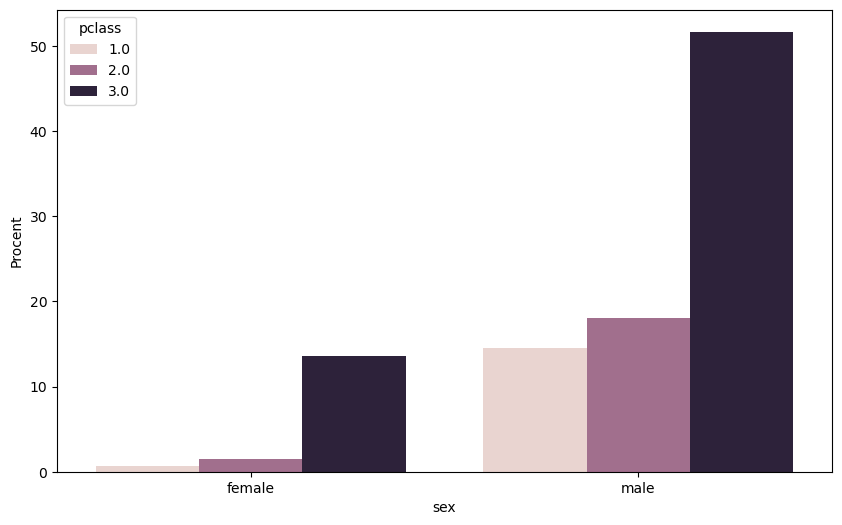

In [39]:
plt.figure(figsize=(10, 6))

sns.barplot(x='sex', y='Procent', hue='pclass', data=survived_df)

Wśrod klasy 1-wszej procent ofiary wśród kobiet to 0,6 %. W klasie 2-ej - 11,32%. W klasie 3-ciej 50,93%. 

W porównaniu z ofiarami mężczyzn: 1 klasa 65,92%, 2 klasa 85,38%, 3 klasa 84,79%

Widzimy zatem dwie tendencje: 
- pierwsza klasa była uprzywilejowana - było ich mniej niż pasażerów klasie 3-ciej, zatem oczekiwalibyśmy, że liczbowo będzie ofiar wśród nich mniej. I tak jest a jednocześnie przeżyło ich dużo więcej również w ujęciu procentowym;
- drugą kwestią była chęć niesienia ratunku przede wszystkim kobietom - chociaż kobiety w klasie 3-ciej miały 4-krotnie mniejszą szansę na przeżycie niż kobiety w klasie drugiej i 9-krotnie mniej szans na przeżycie niż kobiety w klasie 1-wszej.

Poniższa wizualizacja pokazuje zależność pomiędzy kolumną danych dotyczącą statystyki osób ocalałych i zmarłch a płcią:

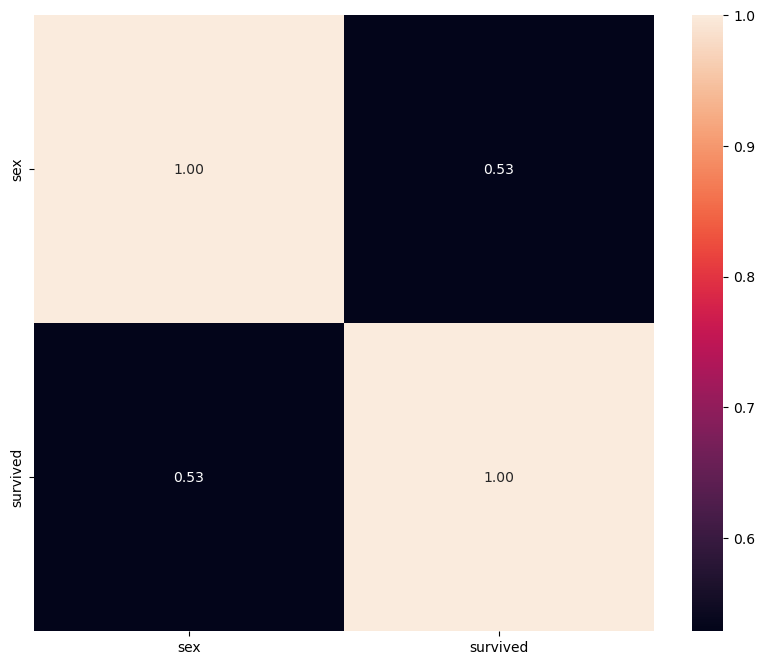

In [169]:
df['sex'] = df['sex'].map({'male': 0, 'female': 1})


corr_matrix = df[['sex', 'survived']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.show()

Zależność  na poziomie 0,53 oznacza dużą zależność pomiędzy tymi danymi.

#### 3.2 Łodzie

In [122]:
df['boat'].value_counts()

13         39
C          38
15         37
14         33
4          31
           ..
13 15       2
5 9         1
8 10        1
13 15 B     1
15 16       1
Name: boat, Length: 27, dtype: int64

Powyższe zestawienie dotyczy danych o numerach łodzi ratunkowych. Zauważamy tutaj braki w danych - łodzie określano w tym zestawieniu nie tylko numerycznie, ale i za pomocą liter, niekiedy zapisywano dwa numery przy jednej osobie.

#### 3.3 Port zaokrętowania

In [123]:
df['embarked'].value_counts()

S    914
C    270
Q    123
Name: embarked, dtype: int64

To zestawienie potwierdza dokładność określenia portu w którym pasażerowie się zaokrętowali. 
Widać przewagę  Southampton ( C = Cherbourg, Q = Queenstown, S = Southampton)

#### 3.4 Rodziny

In [124]:
df['sibsp'].value_counts()

0.0    891
1.0    319
2.0     42
4.0     22
3.0     20
8.0      9
5.0      6
Name: sibsp, dtype: int64

sibsp - Liczba rodzeństwa/małżonków na pokładzie.

In [125]:
df['parch'].value_counts()

0.0    1002
1.0     170
2.0     113
3.0       8
4.0       6
5.0       6
6.0       2
9.0       2
Name: parch, dtype: int64

parch - Liczba rodziców/dzieci na pokładzie.

In [ ]:
#### 3.5 Histogramy

#### Poniżej - wizualizacja niektórych danych w wykresach.
#### Pasażerowie podzieleni na klasy biletowe 

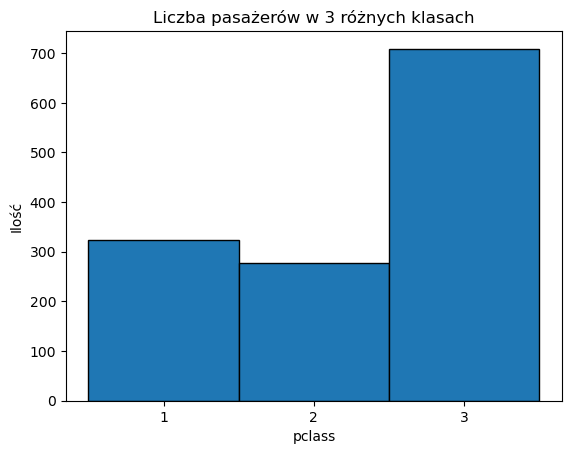

In [126]:
def create_histogram(df, column_name, label, title):
    # Drop NaN values
    df = df.dropna(subset=[column_name])

    
    unique_values = sorted(df[column_name].unique())
    
    
    bin_edges = unique_values + [max(unique_values) + 1]
    
  
    plt.hist(df[column_name], bins=bin_edges, edgecolor='black', align='left')

    
    plt.xticks(unique_values)
    plt.xlabel(column_name)
    plt.ylabel(label)
    plt.title(title)
    
    plt.show()

create_histogram(df, 'pclass', 'Ilość', 'Liczba pasażerów w 3 różnych klasach')

Podział pasażerów na grupy wiekowe ( *oś y -ilość pasażerów, oś x- wiek* ):

<Axes: >

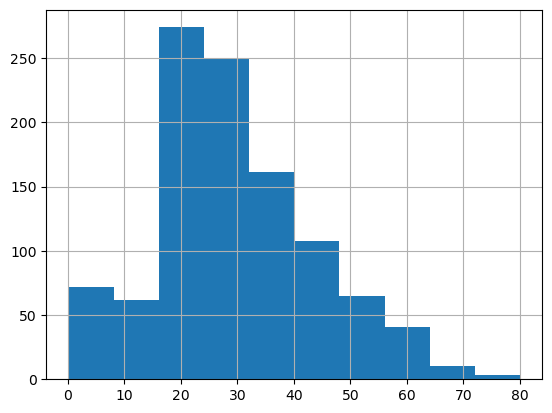

In [127]:
df['age'].hist()

Zmarli ( *na osi x jako 0* ) - ocaleni ( *na osi x jako 1* ):

<Axes: >

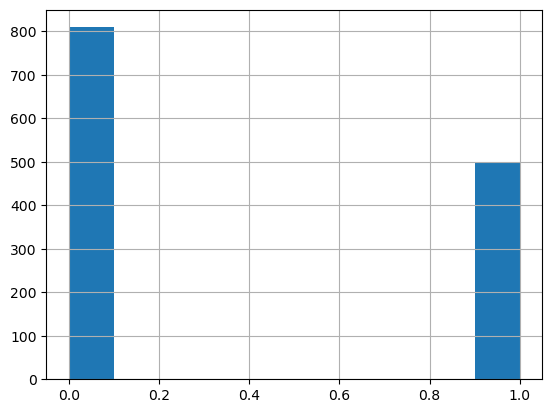

In [128]:
df['survived'].hist()

Ceny biletów - ilość biletów o konkretnych stawkach. Przeważają (powyżej 1000 sztuk) bilety w przedziale cenowym od zera do 50 dolarów ( *oś y ilość biletów, oś x cena* ):

<Axes: >

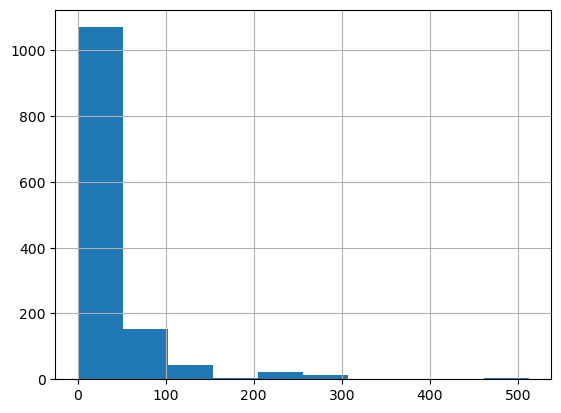

In [129]:
df['fare'].hist()

Rodzeństwo i małżonkowie:

<Axes: >

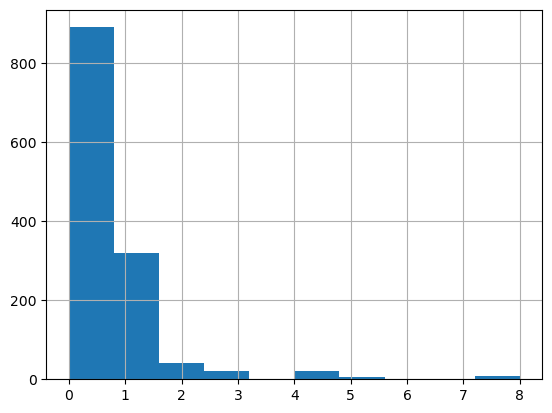

In [130]:
df['sibsp'].hist()

Dzieci i rodzice:

<Axes: >

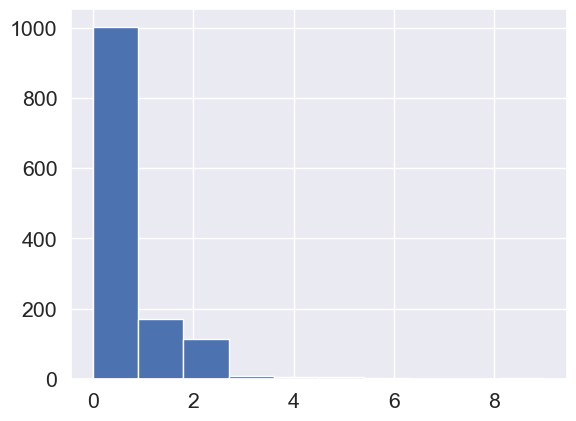

In [70]:
df['parch'].hist()

## 4. Relacje między danymi

#### 4.1 Wykres zależności pomiędzy kolumnami danych:

C:\Users\gjawo\AppData\Local\Temp\ipykernel_18624\3312680243.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mat = df.corr()


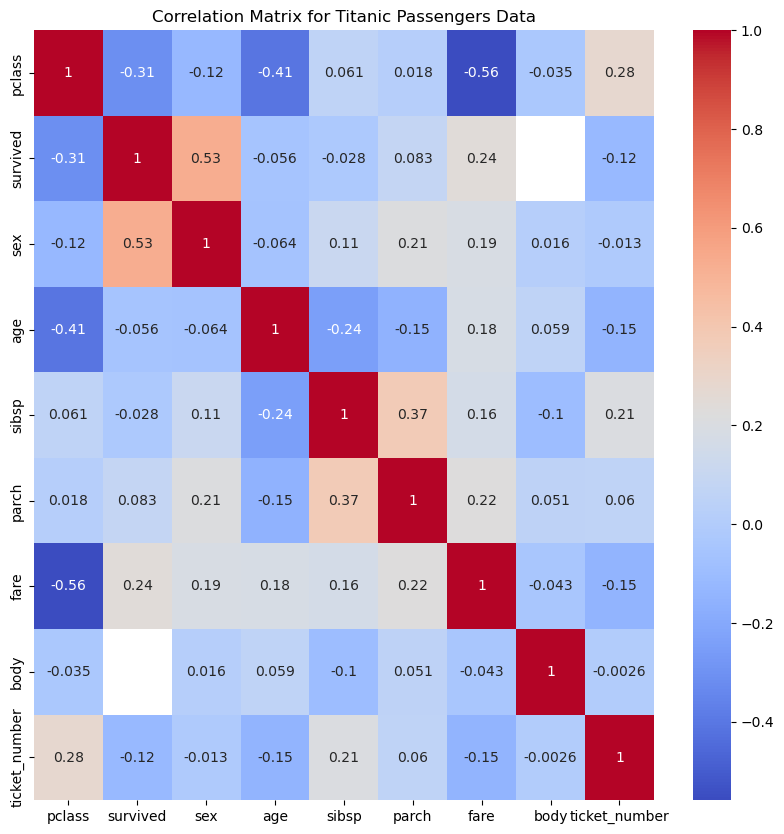

In [170]:
corr_mat = df.corr()

plt.figure(figsize=(10,10))
sns.heatmap(corr_mat, annot=True, cmap='coolwarm')

plt.title('Correlation Matrix for Titanic Passengers Data')
plt.show()

Największe zależności to:
**Zależności pozytywne - watrości rosną razem**
- Wysoka zależność pomiędzy płcią pasażerów a ilością osób ocalałych 
- Umiarkowana zależność pomiędzy ilością małżonków / rodzeństwa, a ilością rodziców / dzieci
- Mała zależność pomiędzy numerem biletu a klasą biletu
  
**zależności odwrotne - gdy jedna wartość wzrasta, druga ma tendencję do zmniejszania się**:
- Wysoka zależność pomiędzy ceną biletu a klasą biletu
- Umiarkowana zależność pomiędzy wiekiem pasażerów a klasą biletu
- Pewna, dość umiarkowana zależność pomiędzy klasą biletu pasażerów a kolumną "ocaleni"

In [134]:
df[["pclass", "fare"]].corr()

pclass      fare
pclass  1.000000 -0.558629
fare   -0.558629  1.000000

#### 4.2 Wykres zależności pomiędzy ceną biletu, klasą biletu a łodzią, w której znaleźli się pasażerowie:

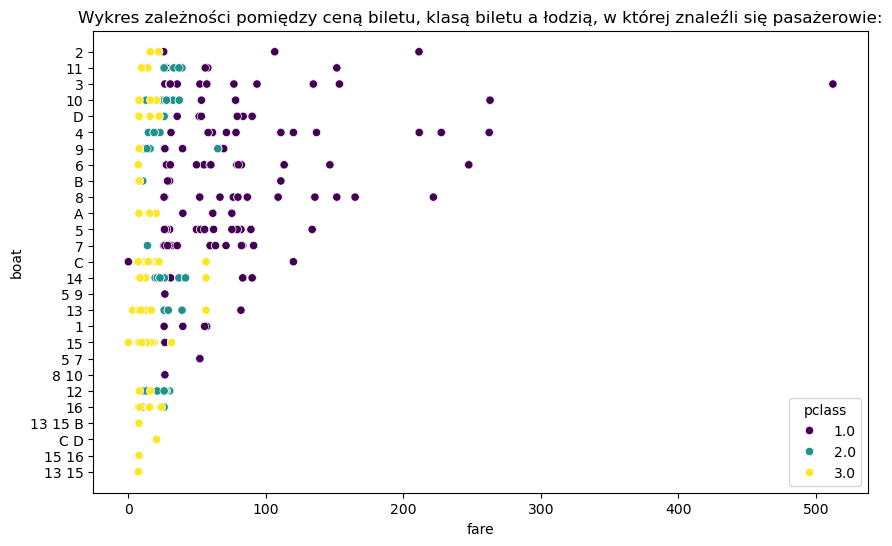

In [171]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='fare', y='boat', hue='pclass', palette='viridis')


plt.title('Wykres zależności pomiędzy ceną biletu, klasą biletu a łodzią, w której znaleźli się pasażerowie:')

plt.show()

Widać tutaj pewną zależność: w części łodzi są jedynie pasażerowie klasy trzeciej, im droższy był bilet, tym bardziej prawdopodobne, że pasażer z tym biletem będzie w łodzi z osobami z bardziej prestiżowej klasy. Może wskazywać to na tendencję do ratowania raczej osób z pierwszej i drugiej klasy.

#### 4.3 Numer biletu a wysokość stawki:

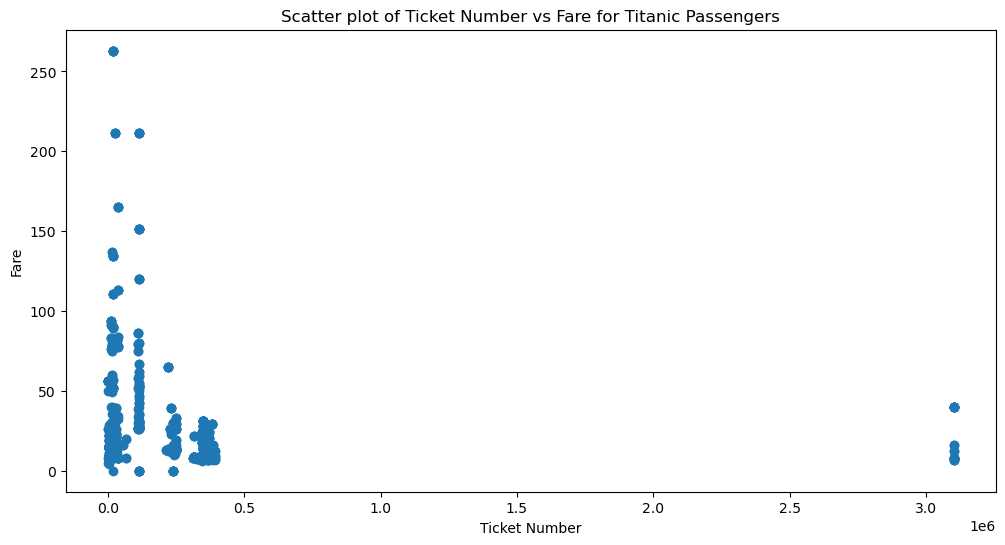

In [184]:
plt.figure(figsize=(12, 6))  # Widen the plot
plt.scatter(df['ticket_number'], df['fare'])

plt.xlabel('Ticket Number')  # Label for x-axis
plt.ylabel('Fare')  # Label for y-axis

plt.title('Scatter plot of Ticket Number vs Fare for Titanic Passengers')  # Title for the plot

plt.show()  # Display the plot

## 5. Analiza wartości odstających

#### 5.1 Klasa biletu a cena

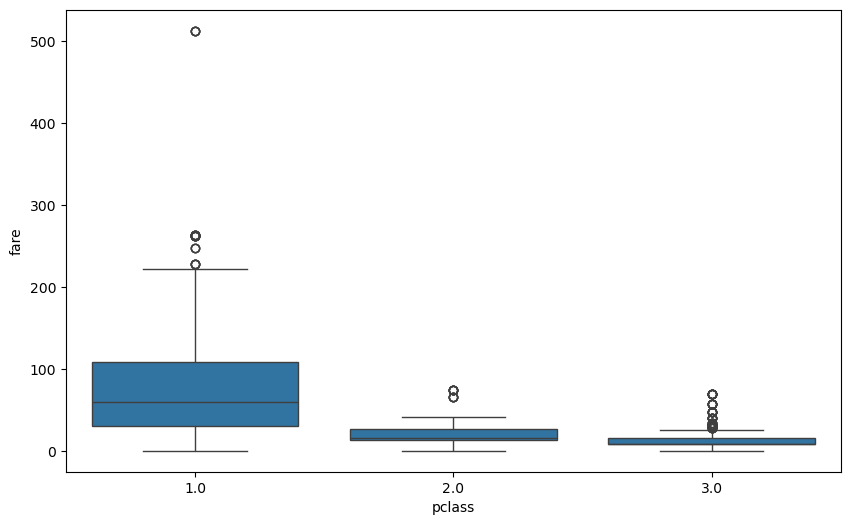

In [139]:
plt.figure(figsize=(10,6))
sns.boxplot(x='pclass', y='fare', data=df)

plt.show()

We wszystkich klasach biletów pojawiała się cena 0. Ceny w klasach kolejnych zaczynały się (uśredniając i pomijając wartości skrajne) tam, gdzie kończyły się ceny w klasie mniej prestiżowej.

#### 5.2 Klasa biletu a wiek pasażerów

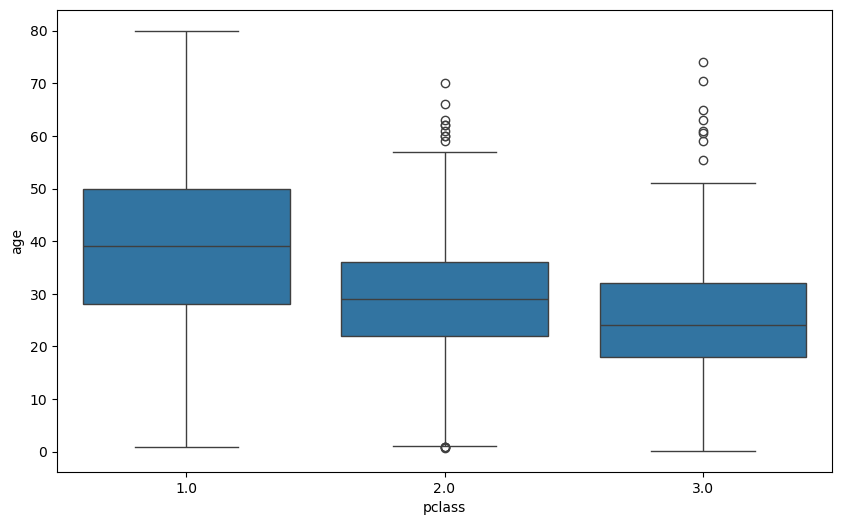

In [143]:
plt.figure(figsize=(10,6))
sns.boxplot(x='pclass', y='age', data=df)

plt.show()

Widzimy, że pasażerowie w klasach mniej luksusowych byli młodsi. Połowa pasażerów 1 klasy miała do 40 lat, podczas gdy większość pasażerów 3-ciej klasy była poniżej 40-stki.

#### 5.3 Klasa biletu i numer biletu

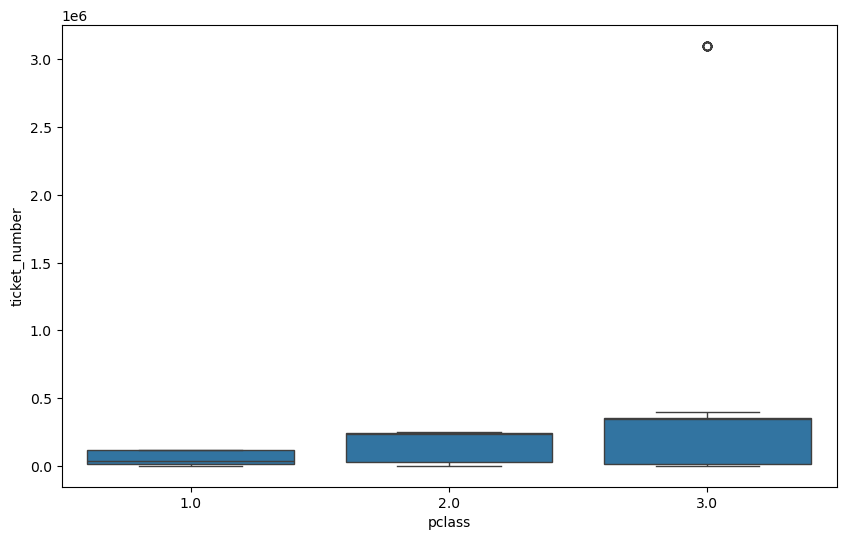

In [155]:
plt.figure(figsize=(10,6))
sns.boxplot(x='pclass', y='ticket_number', data=df)

plt.show()

Najprawdopodobniej numery biletów były oddzielnie liczone dla danej klasy.